The dataset that I have choosen is the Defaulty of Credit card client. This dataset contains 24 columns with categorical, ordinal and continous data. We are predicting the output label (Defaulty = 0,1) i.e wether the client will fall under defaulty or not for paying of the credit card amount.  

Contents of the Notebook:
##Exploratory Data Analysis(EDA):

1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

##Feature Engineering and Data Cleaning:

1)Adding any few features.

2)Removing redundant features.

##Predictive Modeling

1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.


Part1: Exploratory Data Analysis(EDA)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import os
import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Datascience'

In [6]:
os.chdir('/Users/hp/Desktop/Datascience/default-of-credit-card-clients-dataset')

In [7]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Datascience\\default-of-credit-card-clients-dataset'

In [8]:
df = pd.read_csv("UCI_Credit_Card.csv",index_col='ID')
df.rename(columns = {'default.payment.next.month':'Defaulty'}, inplace=True)
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulty
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.shape

(30000, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
Defaulty     30000 non-null int64
dtypes: float64(13), int64(11)
memory usage: 5.7 

In [11]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulty
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


How many defaulty in dataset?

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


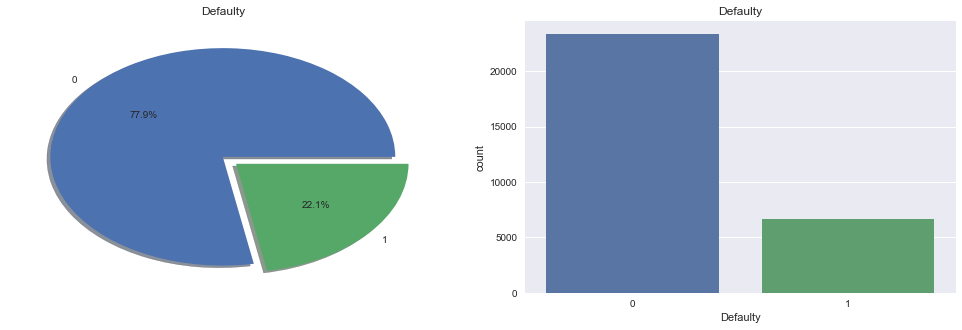

In [12]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
df['Defaulty'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Defaulty')
ax[0].set_ylabel('')
sns.countplot('Defaulty',data=df,ax=ax[1])
ax[1].set_title('Defaulty')
fig.show()

In [13]:
df.groupby(['SEX','Defaulty'])['Defaulty'].count()

SEX  Defaulty
1    0            9015
     1            2873
2    0           14349
     1            3763
Name: Defaulty, dtype: int64

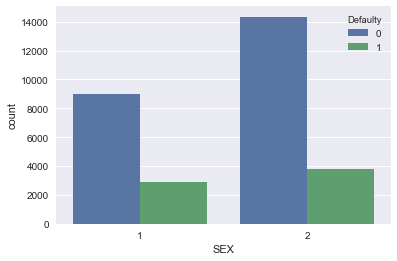

In [14]:
sns.countplot('SEX',hue='Defaulty',data=df)

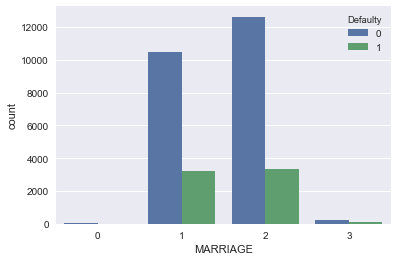

In [15]:
sns.countplot('MARRIAGE',hue='Defaulty',data=df)

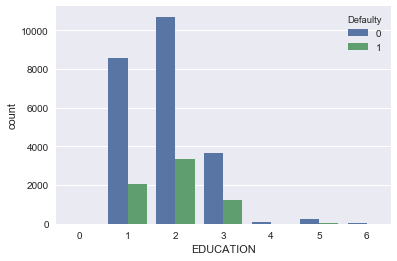

In [16]:
sns.countplot('EDUCATION',hue='Defaulty',data=df)

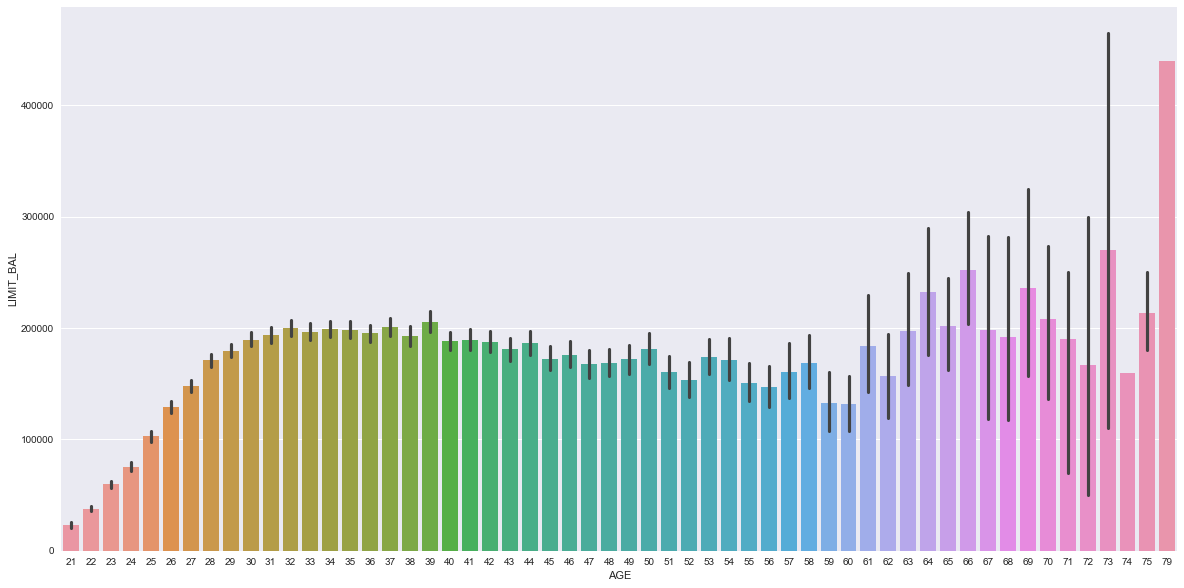

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='AGE',y='LIMIT_BAL',data=df)

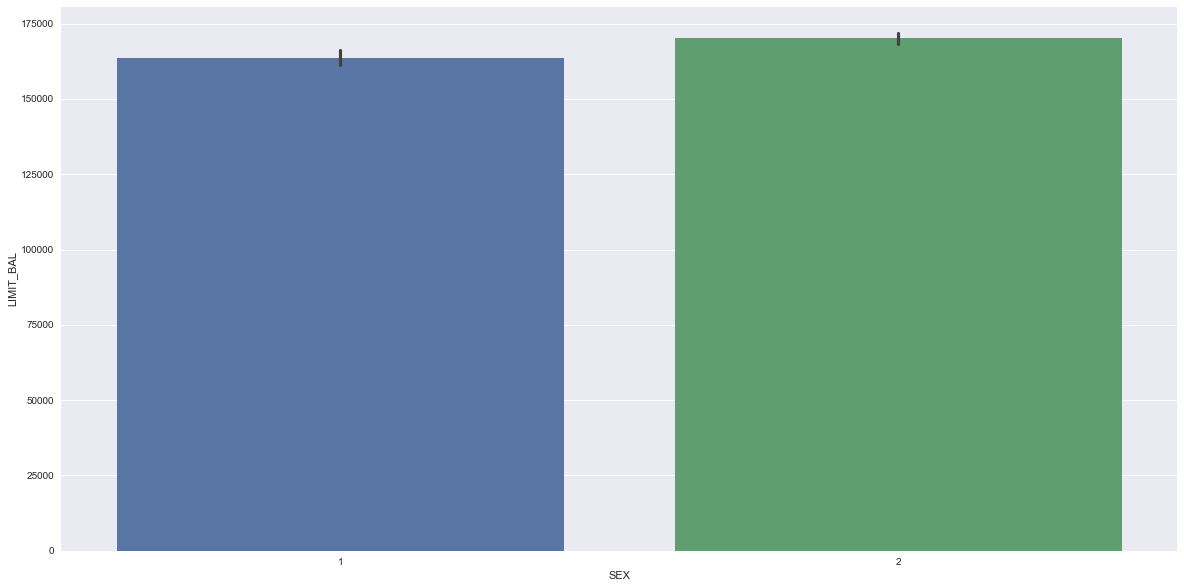

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x='SEX',y='LIMIT_BAL',data=df)

In [19]:
x = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','Defaulty']]
x.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Defaulty
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,0.013890
Defaulty,-0.153520,-0.039961,0.028006,-0.024339,0.013890,1.000000


Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

Now from the below heatmap,we can see that the features are not much correlated. The highest correlation is between Marriage and Age i.e -0.41. So we can carry on with all features.

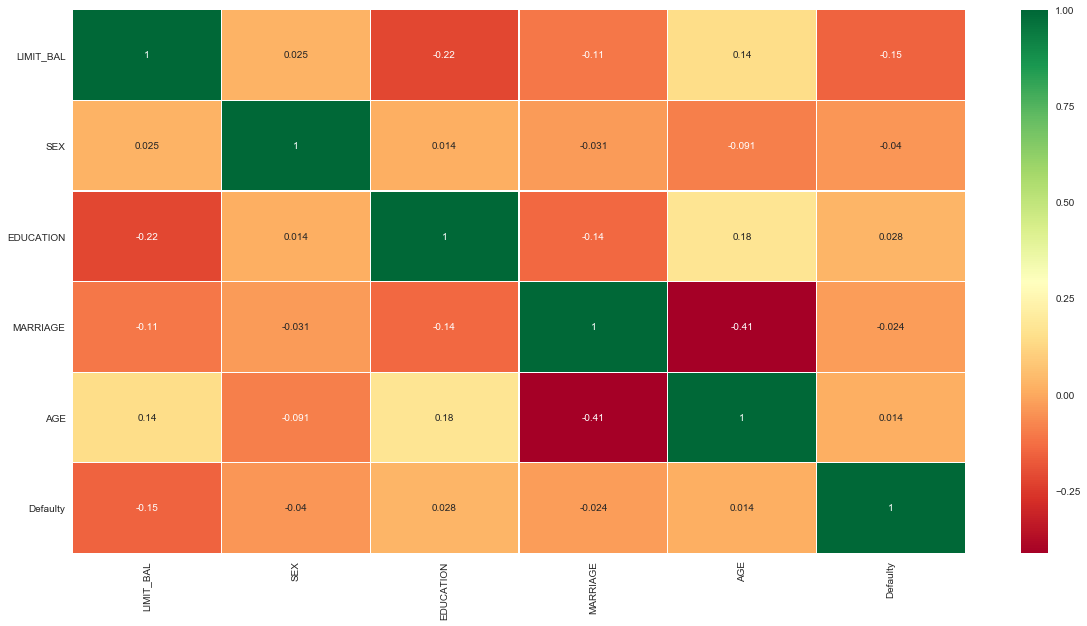

In [20]:
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

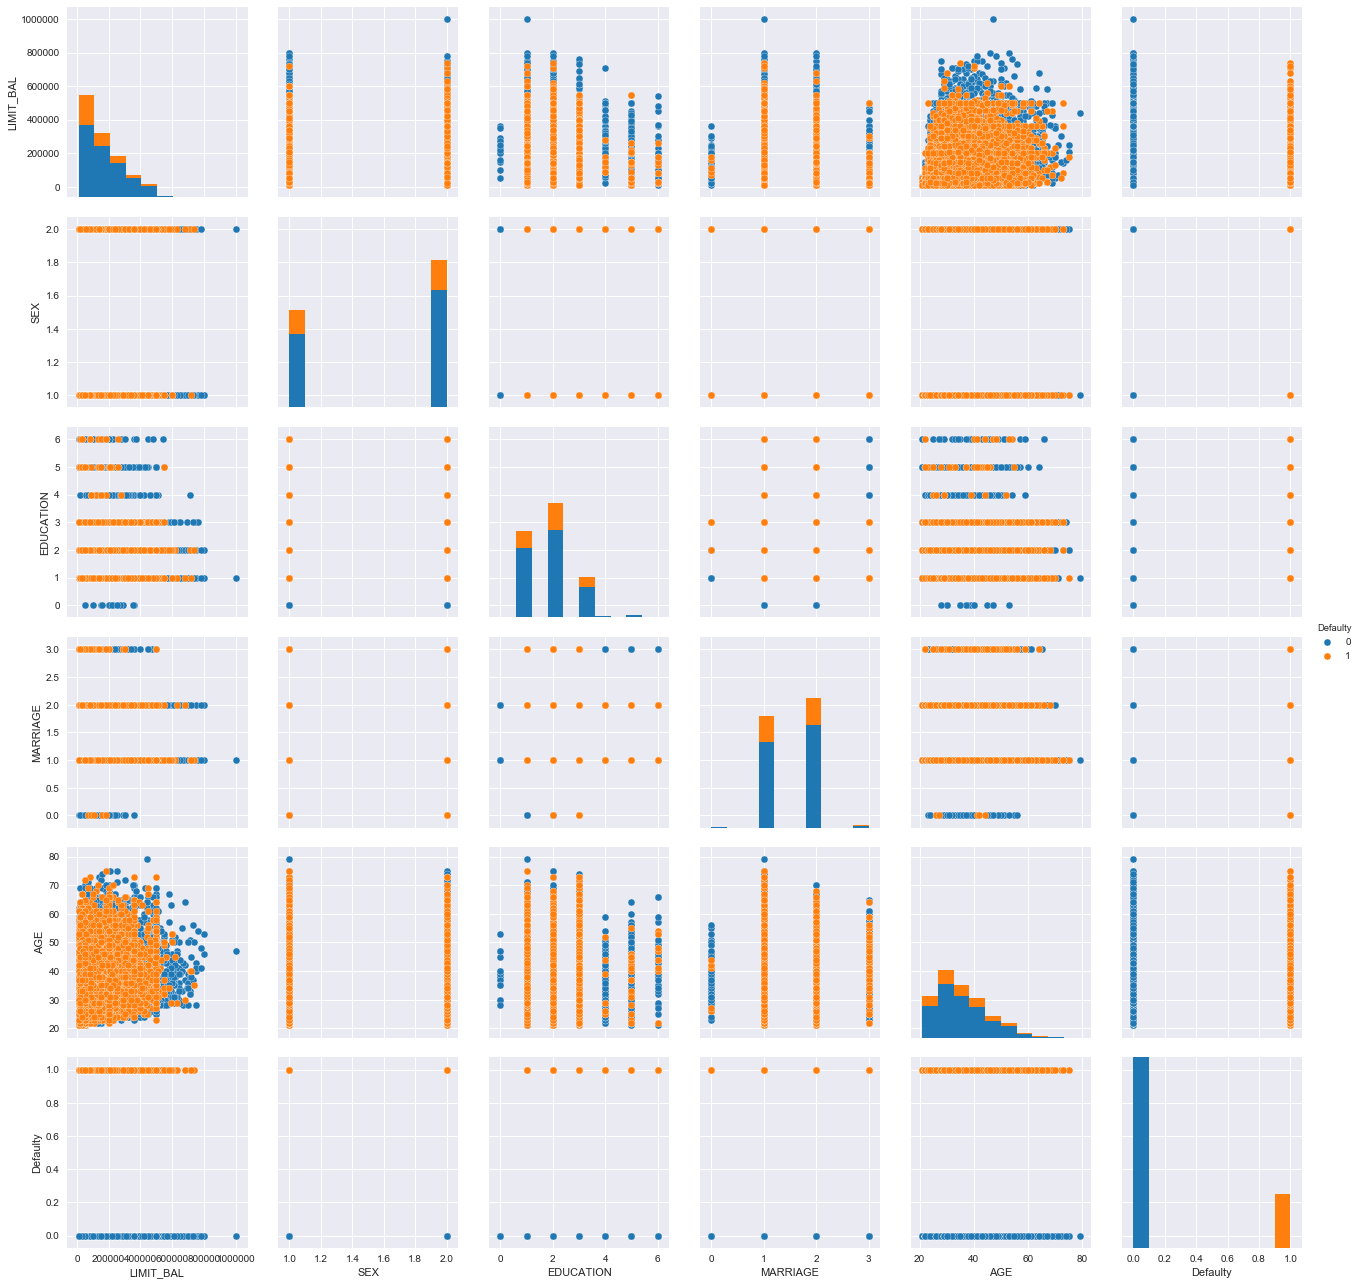

In [21]:
x
sns.pairplot(x, hue='Defaulty', size=3, palette = 'tab10')

In [22]:
pd.crosstab([df.SEX,df.Defaulty],df.EDUCATION,margins=True).style.background_gradient(cmap='summer_r')

In [23]:
pd.crosstab([df.SEX,df.Defaulty],df.MARRIAGE,margins=True).style.background_gradient(cmap='summer_r')

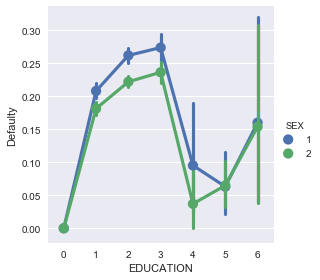

In [24]:
sns.factorplot('EDUCATION','Defaulty',hue='SEX',data=df)
plt.show()

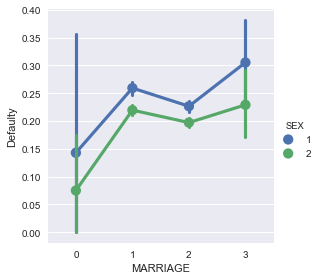

In [25]:
sns.factorplot('MARRIAGE','Defaulty',hue='SEX',data=df)
plt.show()

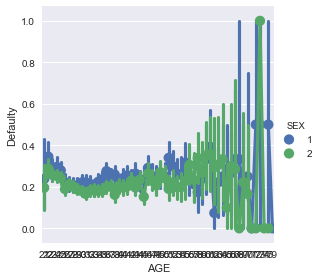

In [26]:
#plt.figure(figsize=(50,50))
sns.factorplot('AGE','Defaulty',hue='SEX',data=df)
fig.set_size_inches(150,10)
plt.show()

In [27]:
print('Oldest Member :',df['AGE'].max(),'Years')
print('Youngest Member :',df['AGE'].min(),'Years')
print('Average Age :',df['AGE'].mean(),'Years')

Oldest Member : 79 Years
Youngest Member : 21 Years
Average Age : 35.4855 Years


In [28]:
print('LIMIT_BALANCE MAX :',df['LIMIT_BAL'].max(),'$')
print('LIMIT_BALANCE MIN :',df['LIMIT_BAL'].min(),'$')
print('Average LIMIT_BALANCE :',df['LIMIT_BAL'].mean(),'$')

LIMIT_BALANCE MAX : 1000000.0 $
LIMIT_BALANCE MIN : 10000.0 $
Average LIMIT_BALANCE : 167484.32266666667 $


In [29]:
x=df[df['Defaulty']==1]
x['LIMIT_BAL'].mean()

130109.65641952984

In [30]:
x=df[df['Defaulty']==0]
x['LIMIT_BAL'].mean()

178099.72607430234

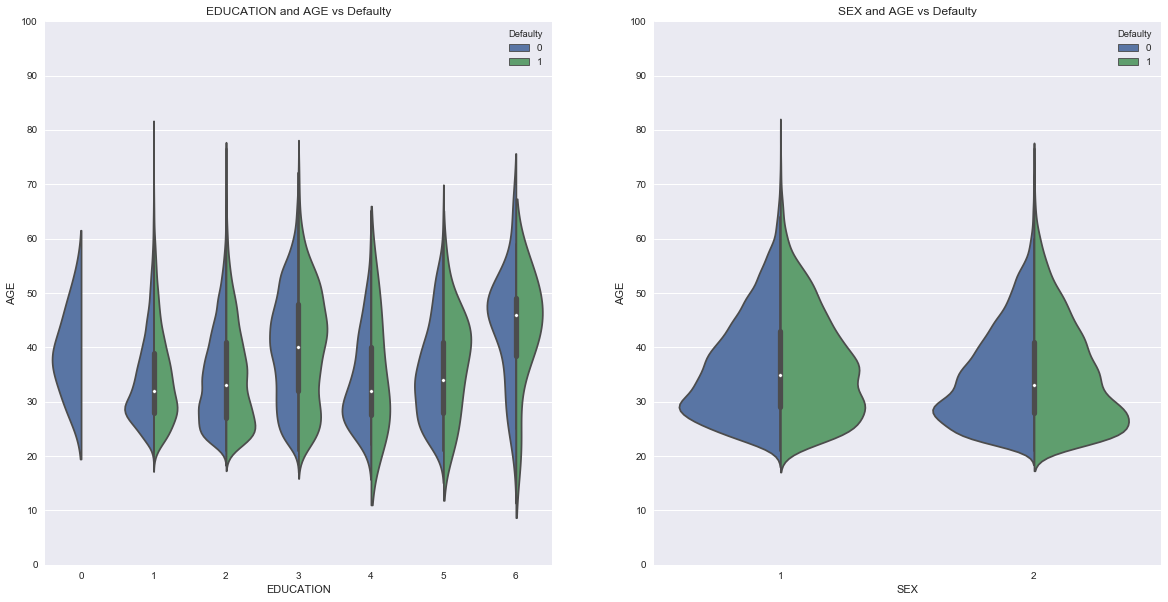

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.violinplot("EDUCATION","AGE", hue="Defaulty", data=df,split=True,ax=ax[0])
ax[0].set_title('EDUCATION and AGE vs Defaulty')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("SEX","AGE", hue="Defaulty", data=df,split=True,ax=ax[1])
ax[1].set_title('SEX and AGE vs Defaulty')
ax[1].set_yticks(range(0,110,10))
plt.show()

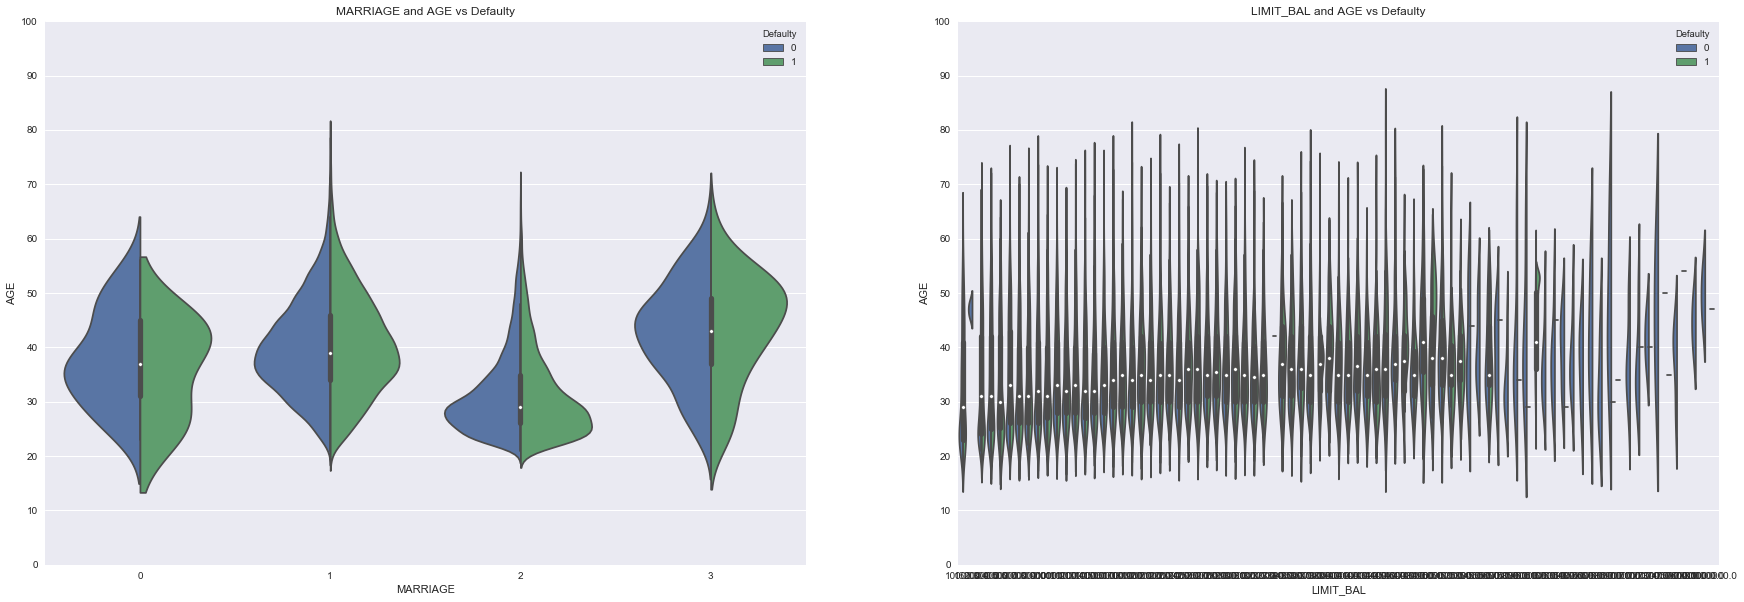

In [32]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.violinplot("MARRIAGE","AGE", hue="Defaulty", data=df,split=True,ax=ax[0])
ax[0].set_title('MARRIAGE and AGE vs Defaulty')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("LIMIT_BAL","AGE", hue="Defaulty", data=df,split=True,ax=ax[1])
ax[1].set_title('LIMIT_BAL and AGE vs Defaulty')
ax[1].set_yticks(range(0,110,10))
plt.show()

Predictive Modeling
We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a customer will be defaulty or not for the credit card payment. So now we will predict the whether the customer will be defaulty or not using some great Classification Algorithms.As the output label is binary, so following are the binary classification algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

Also I have applied ceratin ensebling methods like:
1)Voting Classifier

2)Bagging Classifier

In [33]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score


Splitting the dataset into train and test data.

In [34]:
#Create dataframes of only default and nonDefault observations.
Y =  df['Defaulty']
X = df.drop(['Defaulty'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
X.shape

(30000, 23)

In [35]:
Y.shape

(30000,)

In [36]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

20100
20100
9900
9900


#Transform each feature(Normalization) in features so that it has a mean of 0 and standard deviation of 1 this helps with training the Classifiers.

In [37]:
#Names of all of the features in X_train.
features = X_train.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [35]:
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)


0.7674747474747474

I manually tuned the hyperparameters by hit and trial methods for the below classification models to give the highest predicting accuracy score.

In [36]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.817979797979798


In [37]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for linear SVM is  0.8067676767676768


In [38]:
model=RandomForestClassifier(n_estimators=135,max_depth=8,random_state=1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction1,y_test))
cross_val_score(model, X, Y, cv=5).mean()

The accuracy of the Random Forests is 0.8187878787878788


0.8202339146361272

In [39]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the KNeighborsClassifier is',metrics.accuracy_score(prediction1,y_test))
cross_val_score(model, X, Y, cv=5).mean()

The accuracy of the KNeighborsClassifier is 0.8077777777777778


0.7747667585861138

In [40]:
model = DecisionTreeClassifier(random_state=2)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the DecisionTreeClassifier is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the DecisionTreeClassifier is 0.7313131313131314


In [41]:
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the LogisticRegression is 0.8072727272727273


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=1,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=135,max_depth=8,random_state=1)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=2)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',C=0.1,gamma=0.1,probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
result=cross_val_score(ensemble_lin_rbf,X,Y,cv=5,scoring='accuracy')
print('The cross validated score for VotingClassifier is:',result.mean())

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8133333333333334


In [38]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),random_state=1,n_estimators=200)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=5,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8031313131313131
The cross validated score for bagged KNN is: 0.7641002751407484


In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_predict #prediction
#kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = 5,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

So among all the above classification techniques Random Forest stands out to be the best with the cross validation score of 82.023 %